# Import statements

In [2]:
import pandas as pd
import numpy as np

# Retrieve data from csv

In [3]:
# For colab
from google.colab import drive
drive.mount('/content/drive')

audio_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/MLA Project/final_df.csv')
# audio_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/MLA Project/final_df_30_mfcc.csv')
# audio_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/MLA Project/final_df_40_mfcc.csv')

# For local machine or virtual environment
# audio_df = pd.read_csv()

# drop first column
audio_df.drop('Unnamed: 0', axis='columns', inplace=True)

audio_df.head()


Mounted at /content/drive


,Emotions_with_gender,Path,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,...,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5,Emotions_without_gender
0,13,Ravdess\03-01-01-01-01-01-01.wav,-697.79260,54.890040,0.663466,12.435786,7.733952,0.530750,-3.216631,-3.159394,...,0.000005,0.000004,3.206722e-07,-0.049044,0.020024,-0.018065,-0.064224,0.014611,0.006371,5
1,5,Ravdess\03-01-01-01-01-01-02.wav,-650.71090,54.477303,-9.090127,8.411754,-4.387536,-3.765706,-5.362752,-8.610381,...,0.000006,0.000004,3.992178e-07,-0.019344,0.012139,0.013491,-0.040532,0.006054,0.002813,5
2,13,Ravdess\03-01-01-01-01-01-03.wav,-614.73914,56.708190,-2.685535,10.650176,4.240806,-2.472097,-12.035720,-6.654510,...,0.000071,0.000045,4.472179e-06,-0.013746,-0.006525,0.013147,-0.001333,0.005258,-0.001753,5
3,5,Ravdess\03-01-01-01-01-01-04.wav,-695.85030,42.934265,-7.274557,8.977729,-4.170579,-4.924890,-6.537960,-12.679187,...,0.000013,0.000006,6.443871e-07,-0.006601,0.012613,-0.023542,0.016175,-0.010311,0.000834,5
4,13,Ravdess\03-01-01-01-01-01-05.wav,-713.43350,68.360940,7.989171,15.139791,11.715775,0.430983,1.002558,-2.773119,...,0.000002,0.000001,7.229193e-08,-0.023409,0.016632,-0.042659,0.019653,0.014472,0.010889,5


# Define Class Labels Dictionary


In [4]:
# Define class labels dictionary for with gender
label_map_with_gender = {
    0: 'female_angry',
    1: 'female_calm',
    2: 'female_disgust',
    3: 'female_fear',
    4: 'female_happy',
    5: 'female_neutral',
    6: 'female_sad',
    7: 'female_surprise',
    8: 'male_angry',
    9: 'male_calm',
    10: 'male_disgust',
    11: 'male_fear',
    12: 'male_happy',
    13: 'male_neutral',
    14: 'male_sad',
    15: 'male_surprise'
}

# Define class labels dictionary for without gender
label_map_without_gender = {
    0: 'angry',
    1: 'calm',
    2: 'disgust',
    3: 'fear',
    4: 'happy',
    5: 'neutral',
    6: 'sad',
    7: 'surprise'
}


# Train Test Split

In [5]:
# train-test split dataset
from sklearn.model_selection import train_test_split

final_df_testing = audio_df.copy()

X = final_df_testing.drop(columns=['Path', 'Emotions_without_gender', 'Emotions_with_gender'], axis=1)
y = final_df_testing['Emotions_with_gender']
print(X.shape, y.shape)

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print(X_train.columns.tolist())
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

(11682, 173) (11682,)


# SMOTE

In [6]:
import imblearn

# Handle imbalance classes with SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('\n')
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({3: 882, 4: 881, 6: 878, 0: 875, 2: 871, 5: 759, 12: 624, 10: 613, 14: 610, 8: 609, 11: 608, 13: 499, 7: 398, 9: 83, 15: 78, 1: 77})


Resample dataset shape Counter({8: 882, 12: 882, 13: 882, 7: 882, 2: 882, 1: 882, 10: 882, 14: 882, 0: 882, 3: 882, 4: 882, 6: 882, 11: 882, 5: 882, 9: 882, 15: 882})


In [7]:
X_smote.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,-378.25934,142.494460,18.728182,49.051304,-11.189755,13.789026,-20.046814,5.959044,-10.091767,2.065577,...,3.474225e-10,3.431229e-10,3.404011e-10,3.386486e-10,-0.018237,0.022977,-0.061936,-0.046293,0.003718,0.004589
1,-280.43158,111.077380,4.477443,36.434395,6.658316,-11.301097,-6.449575,5.733023,-26.240240,-7.697083,...,8.770360e-09,8.594583e-09,8.481285e-09,8.410327e-09,0.039016,-0.036646,0.016628,-0.026634,0.000559,0.016998
2,-390.60464,151.329620,7.927677,43.574337,-20.054210,15.369900,-8.707047,10.717097,-13.978950,0.707385,...,2.213621e-08,2.173187e-08,2.147176e-08,2.131012e-08,-0.005917,0.011004,-0.007148,0.020710,0.022689,0.003601
3,-536.52545,24.849909,-13.780848,-5.726334,-3.504691,-7.594936,-13.912262,-9.721022,-13.198851,-0.750943,...,2.138902e-03,1.818220e-03,1.272093e-03,1.290512e-04,-0.020441,-0.019420,-0.003410,0.022635,0.019723,-0.002518
4,-450.62040,51.338820,-20.775835,-6.873811,-5.962627,-13.552367,-11.108770,-20.657516,-10.321867,1.717656,...,1.786042e-03,2.911543e-03,2.350859e-03,2.061317e-04,-0.075340,-0.010692,-0.049214,-0.073696,0.013857,0.004836


# Data selection for training

## Create column range subset for model

In [8]:
# 1 feature
mfcc_columns = X_smote.filter(regex='^MFCC').columns
spectral_contrast_columns = X_smote.filter(regex='^SC').columns
chroma_columns = X_smote.filter(regex='^C').columns
mel_columns = X_smote.filter(regex='^MEL').columns
tonz_columns = X_smote.filter(regex='^TONZ').columns

# 2 features
mfcc_sc_columns = X_smote.filter(regex='^(MFCC|SC)').columns
mfcc_c_columns = X_smote.filter(regex='^(MFCC|C)').columns
mfcc_mel_columns = X_smote.filter(regex='^(MFCC|MEL)').columns
mfcc_tonz_columns = X_smote.filter(regex='^(MFCC|TONZ)').columns

sc_c_columns = X_smote.filter(regex='^(SC|C)').columns
sc_mel_columns = X_smote.filter(regex='^(SC|MEL)').columns
sc_tonz_columns = X_smote.filter(regex='^(SC|TONZ)').columns

c_mel_columns = X_smote.filter(regex='^(C|MEL)').columns
c_tonz_columns = X_smote.filter(regex='^(C|TONZ)').columns

mel_tonz_columns = X_smote.filter(regex='^(MEL|TONZ)').columns


# 3 features
mfcc_sc_c_columns = X_smote.filter(regex='^(MFCC|SC|C)').columns
mfcc_sc_mel_columns = X_smote.filter(regex='^(MFCC|SC|MEL)').columns
mfcc_sc_tonz_columns = X_smote.filter(regex='^(MFCC|SC|TONZ)').columns
mfcc_c_mel_columns = X_smote.filter(regex='^(MFCC|C|MEL)').columns
mfcc_c_tonz_columns = X_smote.filter(regex='^(MFCC|C|TONZ)').columns
mfcc_mel_tonz_columns = X_smote.filter(regex='^(MFCC|MEL|TONZ)').columns

sc_c_mel_columns = X_smote.filter(regex='^(SC|C|MEL)').columns
sc_c_tonz_columns = X_smote.filter(regex='^(SC|C|TONZ)').columns
sc_mel_tonz_columns = X_smote.filter(regex='^(SC|MEL|TONZ)').columns

c_mel_tonz_columns = X_smote.filter(regex='^(C|MEL|TONZ)').columns


# 4 features
mfcc_sc_c_mel_columns = X_smote.filter(regex='^(MFCC|SC|C|MEL)').columns
mfcc_sc_c_tonz_columns = X_smote.filter(regex='^(MFCC|SC|C|TONZ)').columns
mfcc_sc_mel_tonz_columns = X_smote.filter(regex='^(MFCC|SC|MEL|TONZ)').columns
mfcc_c_mel_tonz_columns = X_smote.filter(regex='^(MFCC|C|MEL|TONZ)').columns
sc_c_mel_tonz_columns = X_smote.filter(regex='^(SC|C|MEL|TONZ)').columns



In [9]:
# check length for each data column subset
print("MFCC: " + str(len(mfcc_columns)))
print("Spectral Contrast: " + str(len(spectral_contrast_columns)))
print("Chroma: " + str(len(chroma_columns)))
print("Mel: " + str(len(mel_columns)))
print("Tonz: " + str(len(tonz_columns)))
print("MFCC + Spectral Contrast: " + str(len(mfcc_sc_columns)))
print("MFCC + Chroma: " + str(len(mfcc_c_columns)))
print("MFCC + Mel: " + str(len(mfcc_mel_columns)))
print("MFCC + Tonz: " + str(len(mfcc_tonz_columns)))
print("Spectral Contrast + Chroma: " + str(len(sc_c_columns)))
print("Spectral Contrast + Mel: " + str(len(sc_mel_columns)))
print("Spectral Contrast + Tonz: " + str(len(sc_tonz_columns)))
print("Chroma + Mel: " + str(len(c_mel_columns)))
print("Chroma + Tonz: " + str(len(c_tonz_columns)))
print("Mel + Tonz: " + str(len(mel_tonz_columns)))
print("MFCC + Spectral Contrast + Chroma: " + str(len(mfcc_sc_c_columns)))
print("MFCC + Spectral Contrast + Mel: " + str(len(mfcc_sc_mel_columns)))
print("MFCC + Spectral Contrast + Tonz: " + str(len(mfcc_sc_tonz_columns)))
print("MFCC + Chroma + Mel: " + str(len(mfcc_c_mel_columns)))
print("MFCC + Chroma + Tonz: " + str(len(mfcc_c_tonz_columns)))
print("MFCC + Mel + Tonz: " + str(len(mfcc_mel_tonz_columns)))
print("Spectral Contrast + Chroma + Mel: " + str(len(sc_c_mel_columns)))
print("Spectral Contrast + Chroma + Tonz: " + str(len(sc_c_tonz_columns)))
print("Spectral Contrast + Mel + Tonz: " + str(len(sc_mel_tonz_columns)))
print("Chroma + Mel + Tonz: " + str(len(c_mel_tonz_columns)))
print("MFCC + Spectral Contrast + Chroma + Mel: " + str(len(mfcc_sc_c_mel_columns)))
print("MFCC + Spectral Contrast + Chroma + Tonz: " + str(len(mfcc_sc_c_tonz_columns)))
print("MFCC + Spectral Contrast + Mel + Tonz: " + str(len(mfcc_sc_mel_tonz_columns)))
print("MFCC + Chroma + Mel + Tonz: " + str(len(mfcc_c_mel_tonz_columns)))
print("Spectral Contrast + Chroma + Mel + Tonz: " + str(len(sc_c_mel_tonz_columns)))

MFCC: 20
Spectral Contrast: 7
Chroma: 12
Mel: 128
Tonz: 6
MFCC + Spectral Contrast: 27
MFCC + Chroma: 32
MFCC + Mel: 148
MFCC + Tonz: 26
Spectral Contrast + Chroma: 19
Spectral Contrast + Mel: 135
Spectral Contrast + Tonz: 13
Chroma + Mel: 140
Chroma + Tonz: 18
Mel + Tonz: 134
MFCC + Spectral Contrast + Chroma: 39
MFCC + Spectral Contrast + Mel: 155
MFCC + Spectral Contrast + Tonz: 33
MFCC + Chroma + Mel: 160
MFCC + Chroma + Tonz: 38
MFCC + Mel + Tonz: 154
Spectral Contrast + Chroma + Mel: 147
Spectral Contrast + Chroma + Tonz: 25
Spectral Contrast + Mel + Tonz: 141
Chroma + Mel + Tonz: 146
MFCC + Spectral Contrast + Chroma + Mel: 167
MFCC + Spectral Contrast + Chroma + Tonz: 45
MFCC + Spectral Contrast + Mel + Tonz: 161
MFCC + Chroma + Mel + Tonz: 166
Spectral Contrast + Chroma + Mel + Tonz: 153


## Using 1 feature

### Extract MFCC

In [10]:
X_smote_mfcc_only = X_smote[mfcc_columns]
X_smote_mfcc_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12,MFCC13,MFCC14,MFCC15,MFCC16,MFCC17,MFCC18,MFCC19
0,-378.25934,142.494460,18.728182,49.051304,-11.189755,13.789026,-20.046814,5.959044,-10.091767,2.065577,-6.711366,-6.603781,7.203145,-7.875029,7.474810,-7.525921,-1.443048,-8.235729,-1.378476,-6.579490
1,-280.43158,111.077380,4.477443,36.434395,6.658316,-11.301097,-6.449575,5.733023,-26.240240,-7.697083,-3.883155,-11.568325,1.220963,-1.638327,5.425965,-2.815641,-2.539690,-8.916881,-2.569647,-2.038506
2,-390.60464,151.329620,7.927677,43.574337,-20.054210,15.369900,-8.707047,10.717097,-13.978950,0.707385,-3.083931,-3.076497,5.449810,-5.780198,7.782901,-7.026322,2.017412,-9.875130,2.452558,-1.556041
3,-536.52545,24.849909,-13.780848,-5.726334,-3.504691,-7.594936,-13.912262,-9.721022,-13.198851,-0.750943,-5.811398,-11.489008,-5.003316,-10.656896,-3.642691,-5.861110,-1.555196,3.219537,-0.762933,-1.465527
4,-450.62040,51.338820,-20.775835,-6.873811,-5.962627,-13.552367,-11.108770,-20.657516,-10.321867,1.717656,-13.163830,-6.851687,-3.050495,-7.603552,-2.231389,-7.367519,-3.917986,-2.827754,-1.947413,-1.771344


### Extract SPECTRAL_CONTRAST


In [11]:
X_smote_spectral_contrast_only = X_smote[spectral_contrast_columns]
X_smote_spectral_contrast_only.head()

,SC0,SC1,SC2,SC3,SC4,SC5,SC6
0,13.730023,12.738345,16.132577,15.896472,15.437888,15.985294,63.690804
1,15.062345,15.471258,20.894537,18.301638,18.227469,20.238426,60.665746
2,12.893940,13.512952,17.290626,17.980797,17.161879,16.976291,64.862661
3,17.073191,15.610877,16.320557,16.752719,17.154448,17.157808,45.058532
4,17.211313,19.805433,20.075334,18.409563,19.902520,21.280533,45.727239


### Extract CHROMA


In [12]:
X_smote_chroma_only = X_smote[chroma_columns]
X_smote_chroma_only.head()

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11
0,0.517747,0.344866,0.303467,0.226194,0.285091,0.431936,0.435273,0.347411,0.424108,0.620747,0.584825,0.473497
1,0.385297,0.265291,0.247694,0.243615,0.244736,0.238821,0.329790,0.390232,0.361789,0.404511,0.481966,0.442090
2,0.376083,0.289839,0.270876,0.359710,0.497382,0.348464,0.357235,0.453399,0.532886,0.504682,0.516787,0.415310
3,0.356311,0.425600,0.473863,0.520927,0.549918,0.545797,0.507368,0.510815,0.515108,0.513340,0.447564,0.388547
4,0.268067,0.346934,0.332766,0.330220,0.263914,0.333949,0.361216,0.308600,0.377979,0.444396,0.434071,0.278307


### Extract MEL

In [13]:
X_smote_mel_only = X_smote[mel_columns]
X_smote_mel_only.head()

,MEL0,MEL1,MEL2,MEL3,MEL4,MEL5,MEL6,MEL7,MEL8,MEL9,...,MEL118,MEL119,MEL120,MEL121,MEL122,MEL123,MEL124,MEL125,MEL126,MEL127
0,0.079903,0.035352,0.056618,0.191354,0.368742,0.507795,0.628607,0.709248,1.717609,1.104619,...,4.276802e-10,4.043349e-10,3.859129e-10,3.721779e-10,3.614819e-10,3.533065e-10,3.474225e-10,3.431229e-10,3.404011e-10,3.386486e-10
1,0.068410,0.050712,0.097531,0.383080,0.501259,1.135912,4.550921,4.507062,5.993372,4.502456,...,1.251486e-08,1.128125e-08,1.041546e-08,9.803747e-09,9.349926e-09,9.012690e-09,8.770360e-09,8.594583e-09,8.481285e-09,8.410327e-09
2,0.057079,0.030683,0.115762,0.407303,0.143423,0.080751,0.093717,0.273405,0.390261,0.311902,...,3.067209e-08,2.789204e-08,2.591683e-08,2.451493e-08,2.347057e-08,2.269329e-08,2.213621e-08,2.173187e-08,2.147176e-08,2.131012e-08
3,0.000006,0.000019,0.000057,0.000039,0.000062,0.004435,0.006666,0.034783,0.112354,0.161460,...,1.000978e-03,1.619895e-03,2.662577e-03,2.278591e-03,1.820825e-03,1.992367e-03,2.138902e-03,1.818220e-03,1.272093e-03,1.290512e-04
4,0.000037,0.000122,0.000157,0.000083,0.000165,0.000844,0.074193,0.851783,2.532222,1.360823,...,1.224488e-03,1.264934e-03,9.440670e-04,6.877619e-04,8.166051e-04,1.184760e-03,1.786042e-03,2.911543e-03,2.350859e-03,2.061317e-04


### Extract TONZ

In [14]:
X_smote_tonz_only = X_smote[tonz_columns]
X_smote_tonz_only.head()

,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,-0.018237,0.022977,-0.061936,-0.046293,0.003718,0.004589
1,0.039016,-0.036646,0.016628,-0.026634,0.000559,0.016998
2,-0.005917,0.011004,-0.007148,0.020710,0.022689,0.003601
3,-0.020441,-0.019420,-0.003410,0.022635,0.019723,-0.002518
4,-0.075340,-0.010692,-0.049214,-0.073696,0.013857,0.004836


## Using 2 features

### MFCC and SPECTRAL CONTRAST

In [15]:
X_smote_mfcc_sc_only = X_smote[mfcc_sc_columns]
X_smote_mfcc_sc_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,MFCC17,MFCC18,MFCC19,SC0,SC1,SC2,SC3,SC4,SC5,SC6
0,-378.25934,142.494460,18.728182,49.051304,-11.189755,13.789026,-20.046814,5.959044,-10.091767,2.065577,...,-8.235729,-1.378476,-6.579490,13.730023,12.738345,16.132577,15.896472,15.437888,15.985294,63.690804
1,-280.43158,111.077380,4.477443,36.434395,6.658316,-11.301097,-6.449575,5.733023,-26.240240,-7.697083,...,-8.916881,-2.569647,-2.038506,15.062345,15.471258,20.894537,18.301638,18.227469,20.238426,60.665746
2,-390.60464,151.329620,7.927677,43.574337,-20.054210,15.369900,-8.707047,10.717097,-13.978950,0.707385,...,-9.875130,2.452558,-1.556041,12.893940,13.512952,17.290626,17.980797,17.161879,16.976291,64.862661
3,-536.52545,24.849909,-13.780848,-5.726334,-3.504691,-7.594936,-13.912262,-9.721022,-13.198851,-0.750943,...,3.219537,-0.762933,-1.465527,17.073191,15.610877,16.320557,16.752719,17.154448,17.157808,45.058532
4,-450.62040,51.338820,-20.775835,-6.873811,-5.962627,-13.552367,-11.108770,-20.657516,-10.321867,1.717656,...,-2.827754,-1.947413,-1.771344,17.211313,19.805433,20.075334,18.409563,19.902520,21.280533,45.727239


### MFCC and CHROMA

In [16]:
X_smote_mfcc_c_only = X_smote[mfcc_c_columns]
X_smote_mfcc_c_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11
0,-378.25934,142.494460,18.728182,49.051304,-11.189755,13.789026,-20.046814,5.959044,-10.091767,2.065577,...,0.303467,0.226194,0.285091,0.431936,0.435273,0.347411,0.424108,0.620747,0.584825,0.473497
1,-280.43158,111.077380,4.477443,36.434395,6.658316,-11.301097,-6.449575,5.733023,-26.240240,-7.697083,...,0.247694,0.243615,0.244736,0.238821,0.329790,0.390232,0.361789,0.404511,0.481966,0.442090
2,-390.60464,151.329620,7.927677,43.574337,-20.054210,15.369900,-8.707047,10.717097,-13.978950,0.707385,...,0.270876,0.359710,0.497382,0.348464,0.357235,0.453399,0.532886,0.504682,0.516787,0.415310
3,-536.52545,24.849909,-13.780848,-5.726334,-3.504691,-7.594936,-13.912262,-9.721022,-13.198851,-0.750943,...,0.473863,0.520927,0.549918,0.545797,0.507368,0.510815,0.515108,0.513340,0.447564,0.388547
4,-450.62040,51.338820,-20.775835,-6.873811,-5.962627,-13.552367,-11.108770,-20.657516,-10.321867,1.717656,...,0.332766,0.330220,0.263914,0.333949,0.361216,0.308600,0.377979,0.444396,0.434071,0.278307


### MFCC and MEL

In [17]:
X_smote_mfcc_mel_only = X_smote[mfcc_mel_columns]
X_smote_mfcc_mel_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,MEL118,MEL119,MEL120,MEL121,MEL122,MEL123,MEL124,MEL125,MEL126,MEL127
0,-378.25934,142.494460,18.728182,49.051304,-11.189755,13.789026,-20.046814,5.959044,-10.091767,2.065577,...,4.276802e-10,4.043349e-10,3.859129e-10,3.721779e-10,3.614819e-10,3.533065e-10,3.474225e-10,3.431229e-10,3.404011e-10,3.386486e-10
1,-280.43158,111.077380,4.477443,36.434395,6.658316,-11.301097,-6.449575,5.733023,-26.240240,-7.697083,...,1.251486e-08,1.128125e-08,1.041546e-08,9.803747e-09,9.349926e-09,9.012690e-09,8.770360e-09,8.594583e-09,8.481285e-09,8.410327e-09
2,-390.60464,151.329620,7.927677,43.574337,-20.054210,15.369900,-8.707047,10.717097,-13.978950,0.707385,...,3.067209e-08,2.789204e-08,2.591683e-08,2.451493e-08,2.347057e-08,2.269329e-08,2.213621e-08,2.173187e-08,2.147176e-08,2.131012e-08
3,-536.52545,24.849909,-13.780848,-5.726334,-3.504691,-7.594936,-13.912262,-9.721022,-13.198851,-0.750943,...,1.000978e-03,1.619895e-03,2.662577e-03,2.278591e-03,1.820825e-03,1.992367e-03,2.138902e-03,1.818220e-03,1.272093e-03,1.290512e-04
4,-450.62040,51.338820,-20.775835,-6.873811,-5.962627,-13.552367,-11.108770,-20.657516,-10.321867,1.717656,...,1.224488e-03,1.264934e-03,9.440670e-04,6.877619e-04,8.166051e-04,1.184760e-03,1.786042e-03,2.911543e-03,2.350859e-03,2.061317e-04


### MFCC and TONZ

In [18]:
X_smote_mfcc_tonz_only = X_smote[mfcc_tonz_columns]
X_smote_mfcc_tonz_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,MFCC16,MFCC17,MFCC18,MFCC19,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,-378.25934,142.494460,18.728182,49.051304,-11.189755,13.789026,-20.046814,5.959044,-10.091767,2.065577,...,-1.443048,-8.235729,-1.378476,-6.579490,-0.018237,0.022977,-0.061936,-0.046293,0.003718,0.004589
1,-280.43158,111.077380,4.477443,36.434395,6.658316,-11.301097,-6.449575,5.733023,-26.240240,-7.697083,...,-2.539690,-8.916881,-2.569647,-2.038506,0.039016,-0.036646,0.016628,-0.026634,0.000559,0.016998
2,-390.60464,151.329620,7.927677,43.574337,-20.054210,15.369900,-8.707047,10.717097,-13.978950,0.707385,...,2.017412,-9.875130,2.452558,-1.556041,-0.005917,0.011004,-0.007148,0.020710,0.022689,0.003601
3,-536.52545,24.849909,-13.780848,-5.726334,-3.504691,-7.594936,-13.912262,-9.721022,-13.198851,-0.750943,...,-1.555196,3.219537,-0.762933,-1.465527,-0.020441,-0.019420,-0.003410,0.022635,0.019723,-0.002518
4,-450.62040,51.338820,-20.775835,-6.873811,-5.962627,-13.552367,-11.108770,-20.657516,-10.321867,1.717656,...,-3.917986,-2.827754,-1.947413,-1.771344,-0.075340,-0.010692,-0.049214,-0.073696,0.013857,0.004836


### SPECTRAL CONTRAST and CHROMA

In [19]:
X_smote_sc_c_only = X_smote[sc_c_columns]
X_smote_sc_c_only.head()

,SC0,SC1,SC2,SC3,SC4,SC5,SC6,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11
0,13.730023,12.738345,16.132577,15.896472,15.437888,15.985294,63.690804,0.517747,0.344866,0.303467,0.226194,0.285091,0.431936,0.435273,0.347411,0.424108,0.620747,0.584825,0.473497
1,15.062345,15.471258,20.894537,18.301638,18.227469,20.238426,60.665746,0.385297,0.265291,0.247694,0.243615,0.244736,0.238821,0.329790,0.390232,0.361789,0.404511,0.481966,0.442090
2,12.893940,13.512952,17.290626,17.980797,17.161879,16.976291,64.862661,0.376083,0.289839,0.270876,0.359710,0.497382,0.348464,0.357235,0.453399,0.532886,0.504682,0.516787,0.415310
3,17.073191,15.610877,16.320557,16.752719,17.154448,17.157808,45.058532,0.356311,0.425600,0.473863,0.520927,0.549918,0.545797,0.507368,0.510815,0.515108,0.513340,0.447564,0.388547
4,17.211313,19.805433,20.075334,18.409563,19.902520,21.280533,45.727239,0.268067,0.346934,0.332766,0.330220,0.263914,0.333949,0.361216,0.308600,0.377979,0.444396,0.434071,0.278307


### SPECTRAL CONTRAST and MEL

In [20]:
X_smote_sc_mel_only = X_smote[sc_mel_columns]
X_smote_sc_mel_only.head()

,SC0,SC1,SC2,SC3,SC4,SC5,SC6,MEL0,MEL1,MEL2,...,MEL118,MEL119,MEL120,MEL121,MEL122,MEL123,MEL124,MEL125,MEL126,MEL127
0,13.730023,12.738345,16.132577,15.896472,15.437888,15.985294,63.690804,0.079903,0.035352,0.056618,...,4.276802e-10,4.043349e-10,3.859129e-10,3.721779e-10,3.614819e-10,3.533065e-10,3.474225e-10,3.431229e-10,3.404011e-10,3.386486e-10
1,15.062345,15.471258,20.894537,18.301638,18.227469,20.238426,60.665746,0.068410,0.050712,0.097531,...,1.251486e-08,1.128125e-08,1.041546e-08,9.803747e-09,9.349926e-09,9.012690e-09,8.770360e-09,8.594583e-09,8.481285e-09,8.410327e-09
2,12.893940,13.512952,17.290626,17.980797,17.161879,16.976291,64.862661,0.057079,0.030683,0.115762,...,3.067209e-08,2.789204e-08,2.591683e-08,2.451493e-08,2.347057e-08,2.269329e-08,2.213621e-08,2.173187e-08,2.147176e-08,2.131012e-08
3,17.073191,15.610877,16.320557,16.752719,17.154448,17.157808,45.058532,0.000006,0.000019,0.000057,...,1.000978e-03,1.619895e-03,2.662577e-03,2.278591e-03,1.820825e-03,1.992367e-03,2.138902e-03,1.818220e-03,1.272093e-03,1.290512e-04
4,17.211313,19.805433,20.075334,18.409563,19.902520,21.280533,45.727239,0.000037,0.000122,0.000157,...,1.224488e-03,1.264934e-03,9.440670e-04,6.877619e-04,8.166051e-04,1.184760e-03,1.786042e-03,2.911543e-03,2.350859e-03,2.061317e-04


### SPECTRAL CONTRAST and TONZ

In [21]:
X_smote_sc_tonz_only = X_smote[sc_tonz_columns]
X_smote_sc_tonz_only.head()

,SC0,SC1,SC2,SC3,SC4,SC5,SC6,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,13.730023,12.738345,16.132577,15.896472,15.437888,15.985294,63.690804,-0.018237,0.022977,-0.061936,-0.046293,0.003718,0.004589
1,15.062345,15.471258,20.894537,18.301638,18.227469,20.238426,60.665746,0.039016,-0.036646,0.016628,-0.026634,0.000559,0.016998
2,12.893940,13.512952,17.290626,17.980797,17.161879,16.976291,64.862661,-0.005917,0.011004,-0.007148,0.020710,0.022689,0.003601
3,17.073191,15.610877,16.320557,16.752719,17.154448,17.157808,45.058532,-0.020441,-0.019420,-0.003410,0.022635,0.019723,-0.002518
4,17.211313,19.805433,20.075334,18.409563,19.902520,21.280533,45.727239,-0.075340,-0.010692,-0.049214,-0.073696,0.013857,0.004836


### CHROMA and MEL

In [22]:
X_smote_c_mel_only = X_smote[c_mel_columns]
X_smote_c_mel_only.head()

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,...,MEL118,MEL119,MEL120,MEL121,MEL122,MEL123,MEL124,MEL125,MEL126,MEL127
0,0.517747,0.344866,0.303467,0.226194,0.285091,0.431936,0.435273,0.347411,0.424108,0.620747,...,4.276802e-10,4.043349e-10,3.859129e-10,3.721779e-10,3.614819e-10,3.533065e-10,3.474225e-10,3.431229e-10,3.404011e-10,3.386486e-10
1,0.385297,0.265291,0.247694,0.243615,0.244736,0.238821,0.329790,0.390232,0.361789,0.404511,...,1.251486e-08,1.128125e-08,1.041546e-08,9.803747e-09,9.349926e-09,9.012690e-09,8.770360e-09,8.594583e-09,8.481285e-09,8.410327e-09
2,0.376083,0.289839,0.270876,0.359710,0.497382,0.348464,0.357235,0.453399,0.532886,0.504682,...,3.067209e-08,2.789204e-08,2.591683e-08,2.451493e-08,2.347057e-08,2.269329e-08,2.213621e-08,2.173187e-08,2.147176e-08,2.131012e-08
3,0.356311,0.425600,0.473863,0.520927,0.549918,0.545797,0.507368,0.510815,0.515108,0.513340,...,1.000978e-03,1.619895e-03,2.662577e-03,2.278591e-03,1.820825e-03,1.992367e-03,2.138902e-03,1.818220e-03,1.272093e-03,1.290512e-04
4,0.268067,0.346934,0.332766,0.330220,0.263914,0.333949,0.361216,0.308600,0.377979,0.444396,...,1.224488e-03,1.264934e-03,9.440670e-04,6.877619e-04,8.166051e-04,1.184760e-03,1.786042e-03,2.911543e-03,2.350859e-03,2.061317e-04


### CHROMA and TONZ

In [23]:
X_smote_c_tonz_only = X_smote[c_tonz_columns]
X_smote_c_tonz_only.head()

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,0.517747,0.344866,0.303467,0.226194,0.285091,0.431936,0.435273,0.347411,0.424108,0.620747,0.584825,0.473497,-0.018237,0.022977,-0.061936,-0.046293,0.003718,0.004589
1,0.385297,0.265291,0.247694,0.243615,0.244736,0.238821,0.329790,0.390232,0.361789,0.404511,0.481966,0.442090,0.039016,-0.036646,0.016628,-0.026634,0.000559,0.016998
2,0.376083,0.289839,0.270876,0.359710,0.497382,0.348464,0.357235,0.453399,0.532886,0.504682,0.516787,0.415310,-0.005917,0.011004,-0.007148,0.020710,0.022689,0.003601
3,0.356311,0.425600,0.473863,0.520927,0.549918,0.545797,0.507368,0.510815,0.515108,0.513340,0.447564,0.388547,-0.020441,-0.019420,-0.003410,0.022635,0.019723,-0.002518
4,0.268067,0.346934,0.332766,0.330220,0.263914,0.333949,0.361216,0.308600,0.377979,0.444396,0.434071,0.278307,-0.075340,-0.010692,-0.049214,-0.073696,0.013857,0.004836


### MEL and TONZ

In [24]:
X_smote_mel_tonz_only = X_smote[mel_tonz_columns]
X_smote_mel_tonz_only.head()

,MEL0,MEL1,MEL2,MEL3,MEL4,MEL5,MEL6,MEL7,MEL8,MEL9,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,0.079903,0.035352,0.056618,0.191354,0.368742,0.507795,0.628607,0.709248,1.717609,1.104619,...,3.474225e-10,3.431229e-10,3.404011e-10,3.386486e-10,-0.018237,0.022977,-0.061936,-0.046293,0.003718,0.004589
1,0.068410,0.050712,0.097531,0.383080,0.501259,1.135912,4.550921,4.507062,5.993372,4.502456,...,8.770360e-09,8.594583e-09,8.481285e-09,8.410327e-09,0.039016,-0.036646,0.016628,-0.026634,0.000559,0.016998
2,0.057079,0.030683,0.115762,0.407303,0.143423,0.080751,0.093717,0.273405,0.390261,0.311902,...,2.213621e-08,2.173187e-08,2.147176e-08,2.131012e-08,-0.005917,0.011004,-0.007148,0.020710,0.022689,0.003601
3,0.000006,0.000019,0.000057,0.000039,0.000062,0.004435,0.006666,0.034783,0.112354,0.161460,...,2.138902e-03,1.818220e-03,1.272093e-03,1.290512e-04,-0.020441,-0.019420,-0.003410,0.022635,0.019723,-0.002518
4,0.000037,0.000122,0.000157,0.000083,0.000165,0.000844,0.074193,0.851783,2.532222,1.360823,...,1.786042e-03,2.911543e-03,2.350859e-03,2.061317e-04,-0.075340,-0.010692,-0.049214,-0.073696,0.013857,0.004836


## Using 3 features

### MFCC and SPECTRAL CONTRAST and CHROMA

In [25]:
X_smote_mfcc_sc_c_only = X_smote[mfcc_sc_c_columns]
X_smote_mfcc_sc_c_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11
0,-378.25934,142.494460,18.728182,49.051304,-11.189755,13.789026,-20.046814,5.959044,-10.091767,2.065577,...,0.303467,0.226194,0.285091,0.431936,0.435273,0.347411,0.424108,0.620747,0.584825,0.473497
1,-280.43158,111.077380,4.477443,36.434395,6.658316,-11.301097,-6.449575,5.733023,-26.240240,-7.697083,...,0.247694,0.243615,0.244736,0.238821,0.329790,0.390232,0.361789,0.404511,0.481966,0.442090
2,-390.60464,151.329620,7.927677,43.574337,-20.054210,15.369900,-8.707047,10.717097,-13.978950,0.707385,...,0.270876,0.359710,0.497382,0.348464,0.357235,0.453399,0.532886,0.504682,0.516787,0.415310
3,-536.52545,24.849909,-13.780848,-5.726334,-3.504691,-7.594936,-13.912262,-9.721022,-13.198851,-0.750943,...,0.473863,0.520927,0.549918,0.545797,0.507368,0.510815,0.515108,0.513340,0.447564,0.388547
4,-450.62040,51.338820,-20.775835,-6.873811,-5.962627,-13.552367,-11.108770,-20.657516,-10.321867,1.717656,...,0.332766,0.330220,0.263914,0.333949,0.361216,0.308600,0.377979,0.444396,0.434071,0.278307


### MFCC and SPECTRAL CONTRAST and MEL

In [26]:
X_smote_mfcc_sc_mel_only = X_smote[mfcc_sc_mel_columns]
X_smote_mfcc_sc_mel_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,MEL118,MEL119,MEL120,MEL121,MEL122,MEL123,MEL124,MEL125,MEL126,MEL127
0,-378.25934,142.494460,18.728182,49.051304,-11.189755,13.789026,-20.046814,5.959044,-10.091767,2.065577,...,4.276802e-10,4.043349e-10,3.859129e-10,3.721779e-10,3.614819e-10,3.533065e-10,3.474225e-10,3.431229e-10,3.404011e-10,3.386486e-10
1,-280.43158,111.077380,4.477443,36.434395,6.658316,-11.301097,-6.449575,5.733023,-26.240240,-7.697083,...,1.251486e-08,1.128125e-08,1.041546e-08,9.803747e-09,9.349926e-09,9.012690e-09,8.770360e-09,8.594583e-09,8.481285e-09,8.410327e-09
2,-390.60464,151.329620,7.927677,43.574337,-20.054210,15.369900,-8.707047,10.717097,-13.978950,0.707385,...,3.067209e-08,2.789204e-08,2.591683e-08,2.451493e-08,2.347057e-08,2.269329e-08,2.213621e-08,2.173187e-08,2.147176e-08,2.131012e-08
3,-536.52545,24.849909,-13.780848,-5.726334,-3.504691,-7.594936,-13.912262,-9.721022,-13.198851,-0.750943,...,1.000978e-03,1.619895e-03,2.662577e-03,2.278591e-03,1.820825e-03,1.992367e-03,2.138902e-03,1.818220e-03,1.272093e-03,1.290512e-04
4,-450.62040,51.338820,-20.775835,-6.873811,-5.962627,-13.552367,-11.108770,-20.657516,-10.321867,1.717656,...,1.224488e-03,1.264934e-03,9.440670e-04,6.877619e-04,8.166051e-04,1.184760e-03,1.786042e-03,2.911543e-03,2.350859e-03,2.061317e-04


### MFCC and SPECTRAL CONTRAST and TONZ

In [27]:
X_smote_mfcc_sc_tonz_only = X_smote[mfcc_sc_tonz_columns]
X_smote_mfcc_sc_tonz_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,SC3,SC4,SC5,SC6,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,-378.25934,142.494460,18.728182,49.051304,-11.189755,13.789026,-20.046814,5.959044,-10.091767,2.065577,...,15.896472,15.437888,15.985294,63.690804,-0.018237,0.022977,-0.061936,-0.046293,0.003718,0.004589
1,-280.43158,111.077380,4.477443,36.434395,6.658316,-11.301097,-6.449575,5.733023,-26.240240,-7.697083,...,18.301638,18.227469,20.238426,60.665746,0.039016,-0.036646,0.016628,-0.026634,0.000559,0.016998
2,-390.60464,151.329620,7.927677,43.574337,-20.054210,15.369900,-8.707047,10.717097,-13.978950,0.707385,...,17.980797,17.161879,16.976291,64.862661,-0.005917,0.011004,-0.007148,0.020710,0.022689,0.003601
3,-536.52545,24.849909,-13.780848,-5.726334,-3.504691,-7.594936,-13.912262,-9.721022,-13.198851,-0.750943,...,16.752719,17.154448,17.157808,45.058532,-0.020441,-0.019420,-0.003410,0.022635,0.019723,-0.002518
4,-450.62040,51.338820,-20.775835,-6.873811,-5.962627,-13.552367,-11.108770,-20.657516,-10.321867,1.717656,...,18.409563,19.902520,21.280533,45.727239,-0.075340,-0.010692,-0.049214,-0.073696,0.013857,0.004836


### MFCC and CHROMA and MEL

In [28]:
X_smote_mfcc_c_mel_only = X_smote[mfcc_c_mel_columns]
X_smote_mfcc_c_mel_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,MEL118,MEL119,MEL120,MEL121,MEL122,MEL123,MEL124,MEL125,MEL126,MEL127
0,-378.25934,142.494460,18.728182,49.051304,-11.189755,13.789026,-20.046814,5.959044,-10.091767,2.065577,...,4.276802e-10,4.043349e-10,3.859129e-10,3.721779e-10,3.614819e-10,3.533065e-10,3.474225e-10,3.431229e-10,3.404011e-10,3.386486e-10
1,-280.43158,111.077380,4.477443,36.434395,6.658316,-11.301097,-6.449575,5.733023,-26.240240,-7.697083,...,1.251486e-08,1.128125e-08,1.041546e-08,9.803747e-09,9.349926e-09,9.012690e-09,8.770360e-09,8.594583e-09,8.481285e-09,8.410327e-09
2,-390.60464,151.329620,7.927677,43.574337,-20.054210,15.369900,-8.707047,10.717097,-13.978950,0.707385,...,3.067209e-08,2.789204e-08,2.591683e-08,2.451493e-08,2.347057e-08,2.269329e-08,2.213621e-08,2.173187e-08,2.147176e-08,2.131012e-08
3,-536.52545,24.849909,-13.780848,-5.726334,-3.504691,-7.594936,-13.912262,-9.721022,-13.198851,-0.750943,...,1.000978e-03,1.619895e-03,2.662577e-03,2.278591e-03,1.820825e-03,1.992367e-03,2.138902e-03,1.818220e-03,1.272093e-03,1.290512e-04
4,-450.62040,51.338820,-20.775835,-6.873811,-5.962627,-13.552367,-11.108770,-20.657516,-10.321867,1.717656,...,1.224488e-03,1.264934e-03,9.440670e-04,6.877619e-04,8.166051e-04,1.184760e-03,1.786042e-03,2.911543e-03,2.350859e-03,2.061317e-04


### MFCC and CHROMA and TONZ

In [29]:
X_smote_mfcc_c_tonz_only = X_smote[mfcc_c_tonz_columns]
X_smote_mfcc_c_tonz_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,C8,C9,C10,C11,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,-378.25934,142.494460,18.728182,49.051304,-11.189755,13.789026,-20.046814,5.959044,-10.091767,2.065577,...,0.424108,0.620747,0.584825,0.473497,-0.018237,0.022977,-0.061936,-0.046293,0.003718,0.004589
1,-280.43158,111.077380,4.477443,36.434395,6.658316,-11.301097,-6.449575,5.733023,-26.240240,-7.697083,...,0.361789,0.404511,0.481966,0.442090,0.039016,-0.036646,0.016628,-0.026634,0.000559,0.016998
2,-390.60464,151.329620,7.927677,43.574337,-20.054210,15.369900,-8.707047,10.717097,-13.978950,0.707385,...,0.532886,0.504682,0.516787,0.415310,-0.005917,0.011004,-0.007148,0.020710,0.022689,0.003601
3,-536.52545,24.849909,-13.780848,-5.726334,-3.504691,-7.594936,-13.912262,-9.721022,-13.198851,-0.750943,...,0.515108,0.513340,0.447564,0.388547,-0.020441,-0.019420,-0.003410,0.022635,0.019723,-0.002518
4,-450.62040,51.338820,-20.775835,-6.873811,-5.962627,-13.552367,-11.108770,-20.657516,-10.321867,1.717656,...,0.377979,0.444396,0.434071,0.278307,-0.075340,-0.010692,-0.049214,-0.073696,0.013857,0.004836


### MFCC and MEL and TONZ

In [30]:
X_smote_mfcc_mel_tonz_only = X_smote[mfcc_mel_tonz_columns]
X_smote_mfcc_mel_tonz_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,-378.25934,142.494460,18.728182,49.051304,-11.189755,13.789026,-20.046814,5.959044,-10.091767,2.065577,...,3.474225e-10,3.431229e-10,3.404011e-10,3.386486e-10,-0.018237,0.022977,-0.061936,-0.046293,0.003718,0.004589
1,-280.43158,111.077380,4.477443,36.434395,6.658316,-11.301097,-6.449575,5.733023,-26.240240,-7.697083,...,8.770360e-09,8.594583e-09,8.481285e-09,8.410327e-09,0.039016,-0.036646,0.016628,-0.026634,0.000559,0.016998
2,-390.60464,151.329620,7.927677,43.574337,-20.054210,15.369900,-8.707047,10.717097,-13.978950,0.707385,...,2.213621e-08,2.173187e-08,2.147176e-08,2.131012e-08,-0.005917,0.011004,-0.007148,0.020710,0.022689,0.003601
3,-536.52545,24.849909,-13.780848,-5.726334,-3.504691,-7.594936,-13.912262,-9.721022,-13.198851,-0.750943,...,2.138902e-03,1.818220e-03,1.272093e-03,1.290512e-04,-0.020441,-0.019420,-0.003410,0.022635,0.019723,-0.002518
4,-450.62040,51.338820,-20.775835,-6.873811,-5.962627,-13.552367,-11.108770,-20.657516,-10.321867,1.717656,...,1.786042e-03,2.911543e-03,2.350859e-03,2.061317e-04,-0.075340,-0.010692,-0.049214,-0.073696,0.013857,0.004836


### SPECTRAL CONTRAST and CHROMA and MEL

In [31]:
X_smote_sc_c_mel_only = X_smote[sc_c_mel_columns]
X_smote_sc_c_mel_only.head()

,SC0,SC1,SC2,SC3,SC4,SC5,SC6,C0,C1,C2,...,MEL118,MEL119,MEL120,MEL121,MEL122,MEL123,MEL124,MEL125,MEL126,MEL127
0,13.730023,12.738345,16.132577,15.896472,15.437888,15.985294,63.690804,0.517747,0.344866,0.303467,...,4.276802e-10,4.043349e-10,3.859129e-10,3.721779e-10,3.614819e-10,3.533065e-10,3.474225e-10,3.431229e-10,3.404011e-10,3.386486e-10
1,15.062345,15.471258,20.894537,18.301638,18.227469,20.238426,60.665746,0.385297,0.265291,0.247694,...,1.251486e-08,1.128125e-08,1.041546e-08,9.803747e-09,9.349926e-09,9.012690e-09,8.770360e-09,8.594583e-09,8.481285e-09,8.410327e-09
2,12.893940,13.512952,17.290626,17.980797,17.161879,16.976291,64.862661,0.376083,0.289839,0.270876,...,3.067209e-08,2.789204e-08,2.591683e-08,2.451493e-08,2.347057e-08,2.269329e-08,2.213621e-08,2.173187e-08,2.147176e-08,2.131012e-08
3,17.073191,15.610877,16.320557,16.752719,17.154448,17.157808,45.058532,0.356311,0.425600,0.473863,...,1.000978e-03,1.619895e-03,2.662577e-03,2.278591e-03,1.820825e-03,1.992367e-03,2.138902e-03,1.818220e-03,1.272093e-03,1.290512e-04
4,17.211313,19.805433,20.075334,18.409563,19.902520,21.280533,45.727239,0.268067,0.346934,0.332766,...,1.224488e-03,1.264934e-03,9.440670e-04,6.877619e-04,8.166051e-04,1.184760e-03,1.786042e-03,2.911543e-03,2.350859e-03,2.061317e-04


### SPECTRAL CONTRAST and CHROMA and TONZ

In [32]:
X_smote_sc_c_tonz_only = X_smote[sc_c_tonz_columns]
X_smote_sc_c_tonz_only.head()

,SC0,SC1,SC2,SC3,SC4,SC5,SC6,C0,C1,C2,...,C8,C9,C10,C11,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,13.730023,12.738345,16.132577,15.896472,15.437888,15.985294,63.690804,0.517747,0.344866,0.303467,...,0.424108,0.620747,0.584825,0.473497,-0.018237,0.022977,-0.061936,-0.046293,0.003718,0.004589
1,15.062345,15.471258,20.894537,18.301638,18.227469,20.238426,60.665746,0.385297,0.265291,0.247694,...,0.361789,0.404511,0.481966,0.442090,0.039016,-0.036646,0.016628,-0.026634,0.000559,0.016998
2,12.893940,13.512952,17.290626,17.980797,17.161879,16.976291,64.862661,0.376083,0.289839,0.270876,...,0.532886,0.504682,0.516787,0.415310,-0.005917,0.011004,-0.007148,0.020710,0.022689,0.003601
3,17.073191,15.610877,16.320557,16.752719,17.154448,17.157808,45.058532,0.356311,0.425600,0.473863,...,0.515108,0.513340,0.447564,0.388547,-0.020441,-0.019420,-0.003410,0.022635,0.019723,-0.002518
4,17.211313,19.805433,20.075334,18.409563,19.902520,21.280533,45.727239,0.268067,0.346934,0.332766,...,0.377979,0.444396,0.434071,0.278307,-0.075340,-0.010692,-0.049214,-0.073696,0.013857,0.004836


### SPECTRAL CONTRAST and MEL and TONZ

In [33]:
X_smote_sc_mel_tonz_only = X_smote[sc_mel_tonz_columns]
X_smote_sc_mel_tonz_only.head()

,SC0,SC1,SC2,SC3,SC4,SC5,SC6,MEL0,MEL1,MEL2,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,13.730023,12.738345,16.132577,15.896472,15.437888,15.985294,63.690804,0.079903,0.035352,0.056618,...,3.474225e-10,3.431229e-10,3.404011e-10,3.386486e-10,-0.018237,0.022977,-0.061936,-0.046293,0.003718,0.004589
1,15.062345,15.471258,20.894537,18.301638,18.227469,20.238426,60.665746,0.068410,0.050712,0.097531,...,8.770360e-09,8.594583e-09,8.481285e-09,8.410327e-09,0.039016,-0.036646,0.016628,-0.026634,0.000559,0.016998
2,12.893940,13.512952,17.290626,17.980797,17.161879,16.976291,64.862661,0.057079,0.030683,0.115762,...,2.213621e-08,2.173187e-08,2.147176e-08,2.131012e-08,-0.005917,0.011004,-0.007148,0.020710,0.022689,0.003601
3,17.073191,15.610877,16.320557,16.752719,17.154448,17.157808,45.058532,0.000006,0.000019,0.000057,...,2.138902e-03,1.818220e-03,1.272093e-03,1.290512e-04,-0.020441,-0.019420,-0.003410,0.022635,0.019723,-0.002518
4,17.211313,19.805433,20.075334,18.409563,19.902520,21.280533,45.727239,0.000037,0.000122,0.000157,...,1.786042e-03,2.911543e-03,2.350859e-03,2.061317e-04,-0.075340,-0.010692,-0.049214,-0.073696,0.013857,0.004836


### CHROMA and MEL and TONZ

In [34]:
X_smote_c_mel_tonz_only = X_smote[c_mel_tonz_columns]
X_smote_c_mel_tonz_only.head()

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,0.517747,0.344866,0.303467,0.226194,0.285091,0.431936,0.435273,0.347411,0.424108,0.620747,...,3.474225e-10,3.431229e-10,3.404011e-10,3.386486e-10,-0.018237,0.022977,-0.061936,-0.046293,0.003718,0.004589
1,0.385297,0.265291,0.247694,0.243615,0.244736,0.238821,0.329790,0.390232,0.361789,0.404511,...,8.770360e-09,8.594583e-09,8.481285e-09,8.410327e-09,0.039016,-0.036646,0.016628,-0.026634,0.000559,0.016998
2,0.376083,0.289839,0.270876,0.359710,0.497382,0.348464,0.357235,0.453399,0.532886,0.504682,...,2.213621e-08,2.173187e-08,2.147176e-08,2.131012e-08,-0.005917,0.011004,-0.007148,0.020710,0.022689,0.003601
3,0.356311,0.425600,0.473863,0.520927,0.549918,0.545797,0.507368,0.510815,0.515108,0.513340,...,2.138902e-03,1.818220e-03,1.272093e-03,1.290512e-04,-0.020441,-0.019420,-0.003410,0.022635,0.019723,-0.002518
4,0.268067,0.346934,0.332766,0.330220,0.263914,0.333949,0.361216,0.308600,0.377979,0.444396,...,1.786042e-03,2.911543e-03,2.350859e-03,2.061317e-04,-0.075340,-0.010692,-0.049214,-0.073696,0.013857,0.004836


## Using 4 features

### MFCC and SPECTRAL CONTRAST and CHROMA and MEL

In [35]:
X_smote_mfcc_sc_c_mel_only = X_smote[mfcc_sc_c_mel_columns]
X_smote_mfcc_sc_c_mel_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,MEL118,MEL119,MEL120,MEL121,MEL122,MEL123,MEL124,MEL125,MEL126,MEL127
0,-378.25934,142.494460,18.728182,49.051304,-11.189755,13.789026,-20.046814,5.959044,-10.091767,2.065577,...,4.276802e-10,4.043349e-10,3.859129e-10,3.721779e-10,3.614819e-10,3.533065e-10,3.474225e-10,3.431229e-10,3.404011e-10,3.386486e-10
1,-280.43158,111.077380,4.477443,36.434395,6.658316,-11.301097,-6.449575,5.733023,-26.240240,-7.697083,...,1.251486e-08,1.128125e-08,1.041546e-08,9.803747e-09,9.349926e-09,9.012690e-09,8.770360e-09,8.594583e-09,8.481285e-09,8.410327e-09
2,-390.60464,151.329620,7.927677,43.574337,-20.054210,15.369900,-8.707047,10.717097,-13.978950,0.707385,...,3.067209e-08,2.789204e-08,2.591683e-08,2.451493e-08,2.347057e-08,2.269329e-08,2.213621e-08,2.173187e-08,2.147176e-08,2.131012e-08
3,-536.52545,24.849909,-13.780848,-5.726334,-3.504691,-7.594936,-13.912262,-9.721022,-13.198851,-0.750943,...,1.000978e-03,1.619895e-03,2.662577e-03,2.278591e-03,1.820825e-03,1.992367e-03,2.138902e-03,1.818220e-03,1.272093e-03,1.290512e-04
4,-450.62040,51.338820,-20.775835,-6.873811,-5.962627,-13.552367,-11.108770,-20.657516,-10.321867,1.717656,...,1.224488e-03,1.264934e-03,9.440670e-04,6.877619e-04,8.166051e-04,1.184760e-03,1.786042e-03,2.911543e-03,2.350859e-03,2.061317e-04


### MFCC and SPECTRAL CONTRAST and CHROMA and TONZ

In [36]:
X_smote_mfcc_sc_c_tonz_only = X_smote[mfcc_sc_c_tonz_columns]
X_smote_mfcc_sc_c_tonz_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,C8,C9,C10,C11,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,-378.25934,142.494460,18.728182,49.051304,-11.189755,13.789026,-20.046814,5.959044,-10.091767,2.065577,...,0.424108,0.620747,0.584825,0.473497,-0.018237,0.022977,-0.061936,-0.046293,0.003718,0.004589
1,-280.43158,111.077380,4.477443,36.434395,6.658316,-11.301097,-6.449575,5.733023,-26.240240,-7.697083,...,0.361789,0.404511,0.481966,0.442090,0.039016,-0.036646,0.016628,-0.026634,0.000559,0.016998
2,-390.60464,151.329620,7.927677,43.574337,-20.054210,15.369900,-8.707047,10.717097,-13.978950,0.707385,...,0.532886,0.504682,0.516787,0.415310,-0.005917,0.011004,-0.007148,0.020710,0.022689,0.003601
3,-536.52545,24.849909,-13.780848,-5.726334,-3.504691,-7.594936,-13.912262,-9.721022,-13.198851,-0.750943,...,0.515108,0.513340,0.447564,0.388547,-0.020441,-0.019420,-0.003410,0.022635,0.019723,-0.002518
4,-450.62040,51.338820,-20.775835,-6.873811,-5.962627,-13.552367,-11.108770,-20.657516,-10.321867,1.717656,...,0.377979,0.444396,0.434071,0.278307,-0.075340,-0.010692,-0.049214,-0.073696,0.013857,0.004836


### MFCC and SPECTRAL CONTRAST and MEL and TONZ

In [37]:
X_smote_mfcc_sc_mel_tonz_only = X_smote[mfcc_sc_mel_tonz_columns]
X_smote_mfcc_sc_mel_tonz_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,-378.25934,142.494460,18.728182,49.051304,-11.189755,13.789026,-20.046814,5.959044,-10.091767,2.065577,...,3.474225e-10,3.431229e-10,3.404011e-10,3.386486e-10,-0.018237,0.022977,-0.061936,-0.046293,0.003718,0.004589
1,-280.43158,111.077380,4.477443,36.434395,6.658316,-11.301097,-6.449575,5.733023,-26.240240,-7.697083,...,8.770360e-09,8.594583e-09,8.481285e-09,8.410327e-09,0.039016,-0.036646,0.016628,-0.026634,0.000559,0.016998
2,-390.60464,151.329620,7.927677,43.574337,-20.054210,15.369900,-8.707047,10.717097,-13.978950,0.707385,...,2.213621e-08,2.173187e-08,2.147176e-08,2.131012e-08,-0.005917,0.011004,-0.007148,0.020710,0.022689,0.003601
3,-536.52545,24.849909,-13.780848,-5.726334,-3.504691,-7.594936,-13.912262,-9.721022,-13.198851,-0.750943,...,2.138902e-03,1.818220e-03,1.272093e-03,1.290512e-04,-0.020441,-0.019420,-0.003410,0.022635,0.019723,-0.002518
4,-450.62040,51.338820,-20.775835,-6.873811,-5.962627,-13.552367,-11.108770,-20.657516,-10.321867,1.717656,...,1.786042e-03,2.911543e-03,2.350859e-03,2.061317e-04,-0.075340,-0.010692,-0.049214,-0.073696,0.013857,0.004836


### MFCC and CHROMA and MEL and TONZ

In [38]:
X_smote_mfcc_c_mel_tonz_only = X_smote[mfcc_c_mel_tonz_columns]
X_smote_mfcc_c_mel_tonz_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,-378.25934,142.494460,18.728182,49.051304,-11.189755,13.789026,-20.046814,5.959044,-10.091767,2.065577,...,3.474225e-10,3.431229e-10,3.404011e-10,3.386486e-10,-0.018237,0.022977,-0.061936,-0.046293,0.003718,0.004589
1,-280.43158,111.077380,4.477443,36.434395,6.658316,-11.301097,-6.449575,5.733023,-26.240240,-7.697083,...,8.770360e-09,8.594583e-09,8.481285e-09,8.410327e-09,0.039016,-0.036646,0.016628,-0.026634,0.000559,0.016998
2,-390.60464,151.329620,7.927677,43.574337,-20.054210,15.369900,-8.707047,10.717097,-13.978950,0.707385,...,2.213621e-08,2.173187e-08,2.147176e-08,2.131012e-08,-0.005917,0.011004,-0.007148,0.020710,0.022689,0.003601
3,-536.52545,24.849909,-13.780848,-5.726334,-3.504691,-7.594936,-13.912262,-9.721022,-13.198851,-0.750943,...,2.138902e-03,1.818220e-03,1.272093e-03,1.290512e-04,-0.020441,-0.019420,-0.003410,0.022635,0.019723,-0.002518
4,-450.62040,51.338820,-20.775835,-6.873811,-5.962627,-13.552367,-11.108770,-20.657516,-10.321867,1.717656,...,1.786042e-03,2.911543e-03,2.350859e-03,2.061317e-04,-0.075340,-0.010692,-0.049214,-0.073696,0.013857,0.004836


### SPECTRAL CONTRAST and CHROMA and MEL and TONZ

In [39]:
X_smote_sc_c_mel_tonz_only = X_smote[sc_c_mel_tonz_columns]
X_smote_sc_c_mel_tonz_only.head()

,SC0,SC1,SC2,SC3,SC4,SC5,SC6,C0,C1,C2,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,13.730023,12.738345,16.132577,15.896472,15.437888,15.985294,63.690804,0.517747,0.344866,0.303467,...,3.474225e-10,3.431229e-10,3.404011e-10,3.386486e-10,-0.018237,0.022977,-0.061936,-0.046293,0.003718,0.004589
1,15.062345,15.471258,20.894537,18.301638,18.227469,20.238426,60.665746,0.385297,0.265291,0.247694,...,8.770360e-09,8.594583e-09,8.481285e-09,8.410327e-09,0.039016,-0.036646,0.016628,-0.026634,0.000559,0.016998
2,12.893940,13.512952,17.290626,17.980797,17.161879,16.976291,64.862661,0.376083,0.289839,0.270876,...,2.213621e-08,2.173187e-08,2.147176e-08,2.131012e-08,-0.005917,0.011004,-0.007148,0.020710,0.022689,0.003601
3,17.073191,15.610877,16.320557,16.752719,17.154448,17.157808,45.058532,0.356311,0.425600,0.473863,...,2.138902e-03,1.818220e-03,1.272093e-03,1.290512e-04,-0.020441,-0.019420,-0.003410,0.022635,0.019723,-0.002518
4,17.211313,19.805433,20.075334,18.409563,19.902520,21.280533,45.727239,0.268067,0.346934,0.332766,...,1.786042e-03,2.911543e-03,2.350859e-03,2.061317e-04,-0.075340,-0.010692,-0.049214,-0.073696,0.013857,0.004836


# Assign data to variable for pre-processing

In [40]:
# Combination options

opt_1 = [X_smote, X_test] # all 5 features

# 1 feature
opt_2 = [X_smote_mfcc_only, X_test[mfcc_columns]] # mfcc
opt_3 = [X_smote_spectral_contrast_only, X_test[spectral_contrast_columns]] # spectral contrast
opt_4 = [X_smote_chroma_only, X_test[chroma_columns]] # chroma
opt_5 = [X_smote_mel_only, X_test[mel_columns]] # mel
opt_6 = [X_smote_tonz_only, X_test[tonz_columns]] # tonz

# 2 feature
opt_7 = [X_smote_mfcc_sc_only, X_test[mfcc_sc_columns]] # mfcc + sc
opt_8 = [X_smote_mfcc_c_only, X_test[mfcc_c_columns]] # mfcc + c
opt_9 = [X_smote_mfcc_mel_only, X_test[mfcc_mel_columns]] # mfcc + mel
opt_10 = [X_smote_mfcc_tonz_only, X_test[mfcc_tonz_columns]] # mfcc + tonz
opt_11 = [X_smote_sc_c_only, X_test[sc_c_columns]] # sc + c
opt_12 = [X_smote_sc_mel_only, X_test[sc_mel_columns]] # sc + mel
opt_13 = [X_smote_sc_tonz_only, X_test[sc_tonz_columns]] # sc + tonz
opt_14 = [X_smote_c_mel_only, X_test[c_mel_columns]] # c + mel
opt_15 = [X_smote_c_tonz_only, X_test[c_tonz_columns]] # c + tonz
opt_16 = [X_smote_mel_tonz_only, X_test[mel_tonz_columns]] # mel + tonz

# 3 feature
opt_17 = [X_smote_mfcc_sc_c_only, X_test[mfcc_sc_c_columns]] # mfcc + sc + c
opt_18 = [X_smote_mfcc_sc_mel_only, X_test[mfcc_sc_mel_columns]] # mfcc + sc + mel
opt_19 = [X_smote_mfcc_sc_tonz_only, X_test[mfcc_sc_tonz_columns]] # mfcc + sc + tonz
opt_20 = [X_smote_mfcc_c_mel_only, X_test[mfcc_c_mel_columns]] # mfcc + c + mel
opt_21 = [X_smote_mfcc_c_tonz_only, X_test[mfcc_c_tonz_columns]] # mfcc + c + tonz
opt_22 = [X_smote_mfcc_mel_tonz_only, X_test[mfcc_mel_tonz_columns]] # mfcc + mel + tonz
opt_23 = [X_smote_sc_c_mel_only, X_test[sc_c_mel_columns]] # sc + c + mel
opt_24 = [X_smote_sc_c_tonz_only, X_test[sc_c_tonz_columns]] # sc + c + tonz
opt_25 = [X_smote_sc_mel_tonz_only, X_test[sc_mel_tonz_columns]] # sc + mel + tonz
opt_26 = [X_smote_c_mel_tonz_only, X_test[c_mel_tonz_columns]] # c + mel + tonz

# 4 feature
opt_27 = [X_smote_mfcc_sc_c_mel_only, X_test[mfcc_sc_c_mel_columns]] # mfcc + sc + c + mel
opt_28 = [X_smote_mfcc_sc_c_tonz_only, X_test[mfcc_sc_c_tonz_columns]] # mfcc + sc + c + tonz
opt_29 = [X_smote_mfcc_sc_mel_tonz_only, X_test[mfcc_sc_mel_tonz_columns]] # mfcc + sc + mel + tonz
opt_30 = [X_smote_mfcc_c_mel_tonz_only, X_test[mfcc_c_mel_tonz_columns]] # mfcc + c + mel + tonz
opt_31 = [X_smote_sc_c_mel_tonz_only, X_test[sc_c_mel_tonz_columns]] # sc + c + mel + tonz

# Assign selection option to a variable to be used to pass into the preprocess function defined below
selected_option = opt_1
opt = 'opt_1'

# Conduct normalization? (boolean): True / False
normalize_input = False

# Normalization technique? (string): min max / zscore / ''
norm_tech = ''

# Preprocess data for input to model

In [41]:
# Function to preprocess data
def pre_process_inputs(X_train, X_test, normalize_bool = False, norm_technique=''):

  # Step 1: Convert to numpy array
  train_features_array = X_train.values
  test_features_array = X_test.values


  # Step 2 [Optional]: Do normalization
  if normalize_bool:
    if norm_technique == 'min max':
      # Normalization Technique 1: Min Max scaling
      train_scaled_features_minmax = (train_features_array - np.min(train_features_array)) / (np.max(train_features_array) - np.min(train_features_array))
      test_scaled_features_minmax = (test_features_array - np.min(test_features_array)) / (np.max(test_features_array) - np.min(test_features_array))

    elif norm_technique == 'zscore':
      # Normalization Technique 2: Z-score
      train_scaled_features_zscore = (train_features_array - np.mean(train_features_array)) / np.std(train_features_array)
      test_scaled_features_zscore = (test_features_array - np.mean(test_features_array)) / np.std(test_features_array)


  # Step 3: Assign data to variable (created if we want to do normalization before this step)
  X_train_feature_for_model = train_features_array
  X_test_feature_for_model = test_features_array


  # Step 4: Reshape data for input to RNN (number of features, -1)
  reshaped_X_train_feature_for_model = np.expand_dims(X_train_feature_for_model, -1)
  reshaped_X_train_feature_for_model.shape

  reshaped_X_test_feature_for_model = np.expand_dims(X_test_feature_for_model, -1)
  reshaped_X_test_feature_for_model.shape

  return (reshaped_X_train_feature_for_model, reshaped_X_test_feature_for_model)


In [42]:
# Preprocess selected data
pre_processed_X_train, pre_processed_X_test = pre_process_inputs(selected_option[0], selected_option[1], normalize_input, norm_tech)

# check shape of data
print(pre_processed_X_train.shape)
print(pre_processed_X_test.shape)

(14112, 173, 1)
(2337, 173, 1)


In [43]:
# Step 5: One hot encode labels
from sklearn.preprocessing import LabelBinarizer

# Initialize LabelBinarizer
label_binarizer = LabelBinarizer()

# Fit and transform integer labels
y_train_one_hot_encoded = label_binarizer.fit_transform(y_smote)
y_test_one_hot_encoded = label_binarizer.fit_transform(y_test)


# Build and compile model

In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, SimpleRNN

num_features = pre_processed_X_train.shape[1]
num_classes = y_smote.nunique()

model = Sequential()
model.add(LSTM(units=128, input_shape=(num_features, 1), return_sequences=False, dropout=0.2))
model.add(Dense(64))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
# Use categorical crossentropy if labels are one hot encoded
# Use sparse categorical crossentropy if labels are label encoded meaning they are represented by integers

optimizer = 'adam'
# optimizer = 'RMSprop'
# optimizer = 'Nadam'

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
Total params: 75856 (296.31 KB)
Trainable params: 75856 (296.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Train and evaluate model

In [45]:
# Hyper parameters for training model
epochs = 100
batch_size = 32

# Train the model
model.fit(pre_processed_X_train, y_train_one_hot_encoded, validation_split=0.2, epochs=epochs, batch_size=batch_size)


Epoch 1/100
353/353 [==============================] - 9s 14ms/step - loss: 2.7090 - accuracy: 0.0772 - val_loss: 3.5146 - val_accuracy: 0.0000e+00
Epoch 2/100
353/353 [==============================] - 4s 10ms/step - loss: 2.6595 - accuracy: 0.0989 - val_loss: 3.8483 - val_accuracy: 0.0000e+00
Epoch 3/100
353/353 [==============================] - 4s 10ms/step - loss: 2.3648 - accuracy: 0.1939 - val_loss: 3.1467 - val_accuracy: 0.0000e+00
Epoch 4/100
353/353 [==============================] - 4s 13ms/step - loss: 2.2300 - accuracy: 0.2309 - val_loss: 3.0596 - val_accuracy: 0.0546
Epoch 5/100
353/353 [==============================] - 4s 11ms/step - loss: 2.2145 - accuracy: 0.2436 - val_loss: 3.1971 - val_accuracy: 0.0259
Epoch 6/100
353/353 [==============================] - 3s 10ms/step - loss: 2.1262 - accuracy: 0.2801 - val_loss: 2.9435 - val_accuracy: 0.1413
Epoch 7/100
353/353 [==============================] - 5s 14ms/step - loss: 2.0753 - accuracy: 0.2962 - val_loss: 2.9952 - v

In [46]:
# Evaluate the model
test_loss, test_acc = model.evaluate(pre_processed_X_test, y_test_one_hot_encoded)
print(f"Test accuracy: {test_acc:.4f}")
print(opt)

74/74 [==============================] - 0s 4ms/step - loss: 1.3468 - accuracy: 0.5143
Test accuracy: 0.5143
opt_1


# Save model

In [47]:
# Save the model that is trained using all the audio features
# model.save("/content/drive/My Drive/Colab Notebooks/MLA Project/rnn_model_all_feature.keras")


### Single feature ###

# Save the model that is trained using only MFCC features
# model.save("rnn_model_mfcc_only.keras")

# Save the model that is trained using only SPECTRAL CONTRAST features
# model.save("rnn_model_spectral_contrast_only.keras")

# Save the model that is trained using only CHROMA features
# model.save("rnn_model_chroma_only.keras")

# Save the model that is trained using only MEL features
# model.save("rnn_model_mel_only.keras")

# Save the model that is trained using only TONZ features
# model.save("rnn_model_tonz_only.keras")


### Subset features ###

# Save the model that is trained using all the audio features
# model.save("rnn_model_all_feature.keras")

# Save the model that is trained using all the audio features
# model.save("rnn_model_all_feature.keras")

# Confusion Matrix on Test data

74/74 [==============================] - 1s 4ms/step


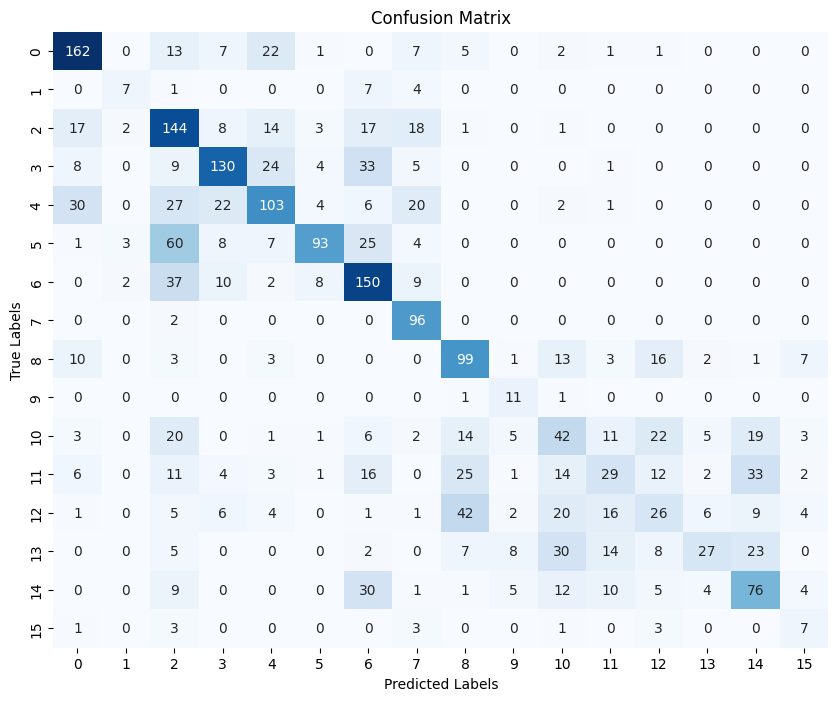

In [48]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predicted labels
y_pred = model.predict(pre_processed_X_test)

# If your model outputs probabilities and you want to get the class with highest probability
# Converts one hot encoded labels back to integer values
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Evaluation using F1 score

In [49]:
# import metrics from sklearn library
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Possible values for average paramter: micro, macro, weighted, samples

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy}')

# Compute precision
precision = precision_score(y_test, y_pred_classes, average='weighted')
print(f'Precision: {precision}')

# Compute recall
recall = recall_score(y_test, y_pred_classes, average='weighted')
print(f'Recall: {recall}')

# Compute F1 score
f1 = f1_score(y_test, y_pred_classes, average='weighted')
print(f'F1-score: {f1}')


Accuracy: 0.5143346170303809
Precision: 0.5228415347072609
Recall: 0.5143346170303809
F1-score: 0.5001116631323268


# Make Predictions

In [50]:
import librosa

# Function to extract features
def extract_features(audio_file):
  # Load audio file
  data, sample_rate = librosa.load(audio_file)

  # Extract features
  mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
  spectral_contrast = np.mean(librosa.feature.spectral_contrast(y=data, sr=sample_rate).T,axis=0)
  chroma = np.mean(librosa.feature.chroma_stft(y=data, sr=sample_rate).T,axis=0)
  mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T,axis=0)
  tonnetz = np.mean(librosa.feature.tonnetz(y=data, sr=sample_rate).T,axis=0)

  # Create dataframe with extracted features
  features = np.concatenate([mfcc, spectral_contrast, chroma, mel, tonnetz])
  feature_names = [f'MFCC_{i}' for i in range(mfcc.shape[0])] + \
                    [f'SPECTRAL_CONTRAST_{i}' for i in range(spectral_contrast.shape[0])] + \
                    [f'CHROMA_{i}' for i in range(chroma.shape[0])] + \
                    [f'MEL_{i}' for i in range(mel.shape[0])] + \
                    [f'TONZ_{i}' for i in range(tonnetz.shape[0])]
  feature_df = pd.DataFrame([features], columns=feature_names)

  return feature_df


# Function to reshape feature
def reshape_feature(extracted_feature):
  extracted_feature = extracted_feature.values
  reshaped_feature = np.expand_dims(extracted_feature, -1)

  return reshaped_feature


# Function to prediction
def get_prediction(audio_feature, with_gender):
  prediction = model.predict(audio_feature)
  label = np.argmax(prediction, axis=1)
  if with_gender:
    categorical_label = label_map_with_gender[label[0]]
  else:
    categorical_label = label_map_without_gender[label[0]]

  return categorical_label


In [51]:
# Load audio features for the sample audio file
predict_audio_file_1 = "/content/drive/My Drive/Colab Notebooks/MLA Project/Test data/1001_DFA_ANG_XX.wav"
predict_audio_file_1_label = 'Angry'

# Extract features
audio_1_feature = extract_features(predict_audio_file_1)

# Reshape feature
X_audio_1 = reshape_feature(audio_1_feature)

# Get prediction
print(get_prediction(X_audio_1, True))

1/1 [==============================] - 0s 25ms/step
male_angry


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=785
  warnings.warn(


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0b28ef1e-f6a6-4523-8903-70adcffed1c5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>